# Подключение библиотек, определение функций.

In [ ]:
# Подключение небходимых библиотек
# Импортируем необходимые для работы библиотеки
import numpy as np # модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций
import re # очистка от ненужных символов
import pandas as pd # применяется для обработки и анализа табличных данных
import nltk # библиотека для обработки естественного языка
import csv # создает табличные пользовательские объекты из элементов в CSV-файлах
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from nltk.corpus import stopwords # словарь стоп-слов
from collections import Counter # предназначен для удобных и быстрых подсчетов количества появлений неизменяемых элементов в последовательностях
from wordcloud import WordCloud # библиотека для подсчёта количества слов в тексте для визуализации
from sklearn.model_selection import train_test_split # разделение матрицы на случайные подмножества
from sklearn.feature_extraction.text import CountVectorizer # реализация хэширования текстовой функции извлечения пакета
from sklearn.naive_bayes import GaussianNB # Гауссовский наивный байесовский метод (GaussianNB)
from sklearn.naive_bayes import MultinomialNB # Наивный байесовский классификатор для полиномиальных моделей. Подходит для классификации с дискретными признаками (например, количество слов для классификации текста)
from sklearn.feature_extraction.text import TfidfTransformer # Преобразует матрицу количества в нормализованное представление tf или tf-idf

In [ ]:
nltk.download('stopwords') # скачиваем словарь стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # лемматизация

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Работа с датасетом

In [ ]:
#задание датафрейма в пандас
df = pd.read_csv('spam_ham_dataset2.csv', names = ["text", "label_num"], encoding='ISO-8859-5')
# Чтобы получить доступ к нашим данным из CSV-файла, используем функцию read_csv(), которая извлекает данные в форме фрейма данных
# spam_ham_dataset.csv это название нашего файла, в names текст и номер метки (0, 1, спам, не спам)
# encoding='ISO-8859-5' - 8-битная кодировка из серии ISO-8859 для записи кириллицы

Смотрим на исходный датасет

In [ ]:
df # Выводит датасет

,text,label_num
0,enron methanol ; meter # : 988291\nthis is a f...,0
1,"hpl nom for january 9 , 2001\n( see attached f...",0
2,"neon retreat\nho ho ho , we ' re around to tha...",0
3,"photoshop , windows , office . cheap . main tr...",1
4,re : indian springs\nthis deal is to book the ...,0
...,...,...
5166,put the 10 on the ft\nthe transport volumes de...,0
5167,3 / 4 / 2000 and following noms\nhpl can ' t t...,0
5168,"calpine daily gas nomination\n>\n>\njulie , as...",0
5169,industrial worksheets for august 2000 activity...,0


<Axes: ylabel='label_num'>

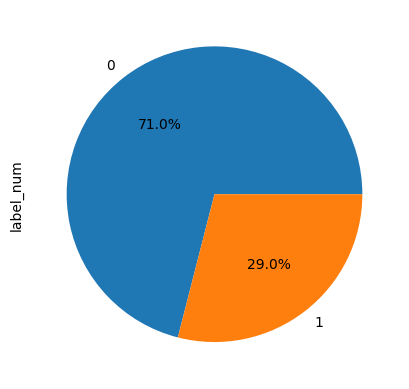

In [ ]:
#визуализация датафрейма
df['label_num'].value_counts().plot.pie(autopct='%1.1f%%') # вывод информации о количестве спаи и не спам писем

Причесываем датасет

In [ ]:
def clean(text): # создаем функцию для очистки текста
    text = re.sub("[^a-zA-Z]"," ",text) # очистка текста от неалфавитных символов
    text = text.lower() # изменение регистра символов
    text = nltk.word_tokenize(text) # проводим токенизацию строк
    text = [slovo for slovo in text if not slovo in stopwords.words("english")] # удаление стоп-слов
    text = [nltk.WordNetLemmatizer().lemmatize(slovo) for slovo in text] # лемматизация токенов
    return " ".join(text) # возвращение пробелов между токенами
df["text"] = df["text"].apply(clean) # применяем эту функцию

Смотрим что получилось

In [ ]:
df # отобразили датасет

,text,label_num
0,enron methanol meter follow note gave monday p...,0
1,hpl nom january see attached file hplnol xl hp...,0
2,neon retreat ho ho ho around wonderful time ye...,0
3,photoshop window office cheap main trending ab...,1
4,indian spring deal book teco pvr revenue under...,0
...,...,...
5166,put ft transport volume decreased contract tha...,0
5167,following noms hpl take extra mmcf weekend try...,0
5168,calpine daily gas nomination julie mention ear...,0
5169,industrial worksheet august activity attached ...,0


In [ ]:
spam_vector = "" # создание переменной в которую будем писать слова из спам сообщений
for stroka in df[df["label_num"] == 1].text:
  stroka = stroka.split(" ")
  for slovo in stroka:
      spam_vector = spam_vector + slovo + " "

ham_vector = "" # создание переменной в которую будем писать слова из не спам сообщений
for stroka in df[df["label_num"] == 0].text:
  stroka = stroka.split(" ")
  for slovo in stroka:
      ham_vector = ham_vector + slovo + " "

In [ ]:
spam_vector

'photoshop window office cheap main trending abasement darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clear bayda inconveniencing managing represented smartness hashish academy shareholder unload badness danielson pure caffein spaniard chargeable levin looking medication best source difficult make material condition better best law easy enough ruin bad law excuse found best simpliest site medication net perscription easy delivery private secure easy better see rightly pound week squint million got anything ever want erection treatment pill anti depressant pill weight loss http splicing bombahakcx com knowledge human power synonymous high quality stuff low rate moneyback guarantee god nature sufficeth unto wise hath need author vocable rnd word asceticism vcsc brand new stock attention vocalscape inc stock symbol vcsc vcsc top stock pick month april stock expe

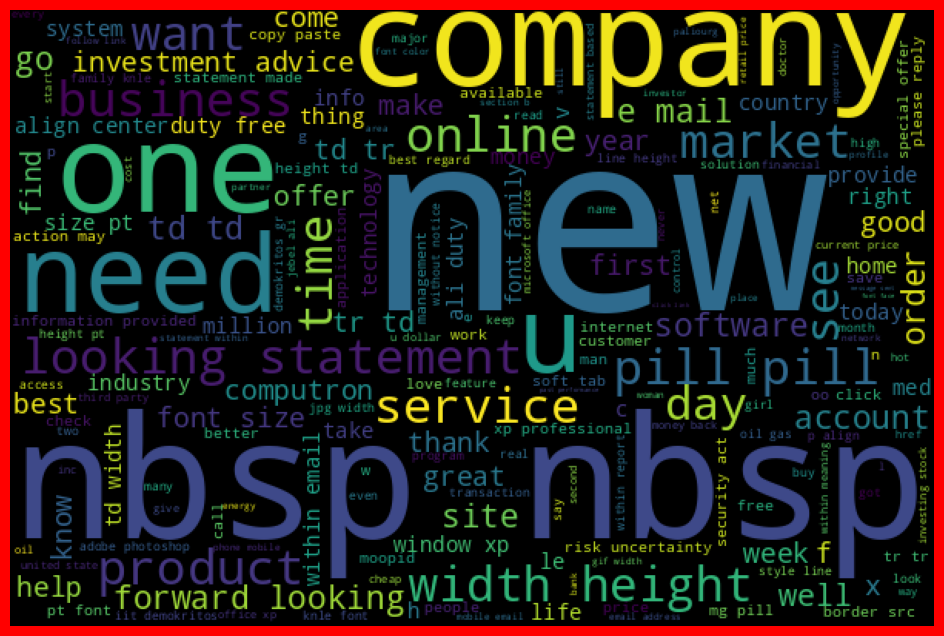

In [ ]:
WordCloud_spam = WordCloud(width=600, height=400).generate(spam_vector)
plt.figure(figsize=(12,8), facecolor="red")
plt.imshow(WordCloud_spam)
plt.axis("off")
plt.show()

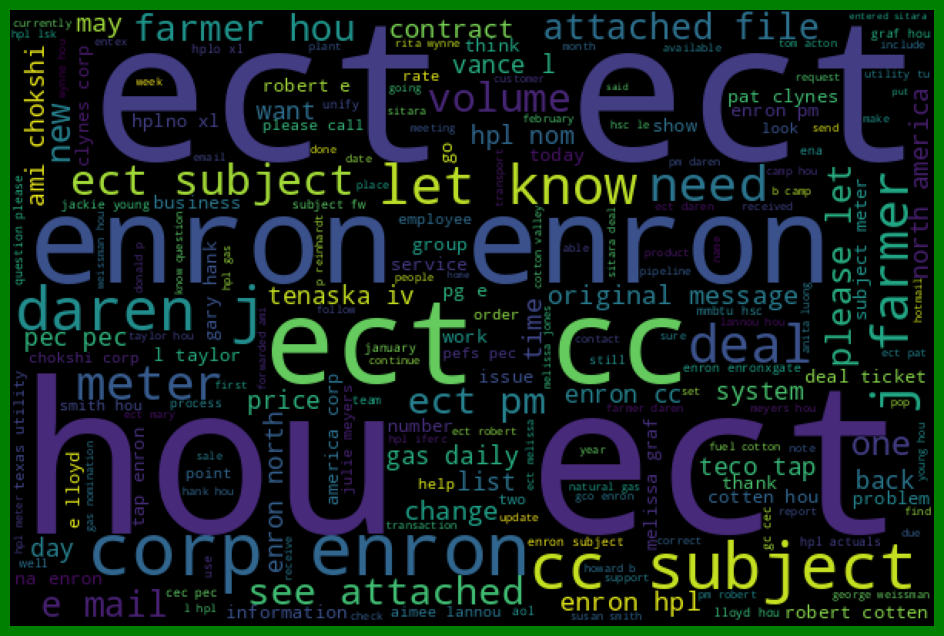

In [ ]:
WordCloud_ham = WordCloud(width=600, height=400).generate(ham_vector)
plt.figure(figsize=(12,8), facecolor="green")
plt.imshow(WordCloud_ham)
plt.axis("off")
plt.show()

Делим наш датасет на выборки

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], df["label_num"], train_size=0.7) # Делим датасет

# X_train, y_train — это оригинальный набор данных, которые будут использоваться в качестве модели обучения
# X_test,y_test — эта часть данных не участвует в обучении модели, а используется для оценки модели
# train_size — размер данных для обучения (70%), остальные будут использоваться для проверки модели
# Разбиение на обучающие и тестовые данные выполняем с помощью функции train_test_split

In [ ]:
x_train

2581    duve khumalo duve khumalo tel email duvmalo ma...
1223    mystery shopping extra casual income customer ...
263     ec ei smi revision effective sea robin p l for...
788     excellence med smartooptions line med http www...
1582    deal id daren deal desk desk amoco gas katy xp...
                              ...                        
1175    alert spam prevention cllck stop sign stop spa...
3601    next kin attn dear sir madam mr michael fisher...
958     good friday fyi risk team office friday pat ev...
1023    tenaska see demand fee change williams price c...
4719    tenaska iv cleburne march spreadsheet march th...
Name: text, Length: 3619, dtype: object

In [ ]:
y_train

2581    1
1223    1
263     0
788     1
1582    0
       ..
1175    1
3601    1
958     0
1023    0
4719    0
Name: label_num, Length: 3619, dtype: int64

In [ ]:
vectorize = CountVectorizer() # векторизация и представление текстовых документов
x_train = vectorize.fit_transform(x_train) # подготовка обучающих данных
x_test = vectorize.transform(x_test) # преобразование текстовой строки в токены

In [ ]:
x_train  # матрица тренировочного набора x

<3619x35144 sparse matrix of type '<class 'numpy.int64'>'
	with 214646 stored elements in Compressed Sparse Row format>

In [ ]:
y_train # тренировочный набора y

2581    1
1223    1
263     0
788     1
1582    0
       ..
1175    1
3601    1
958     0
1023    0
4719    0
Name: label_num, Length: 3619, dtype: int64

Объявление классификаторов и обучение модели

In [ ]:
gnb = GaussianNB() # эта команда поможет нам инициализировать модель. GaussianNB реализует гауссовский наивный байесовский алгоритм для классификации
gnb.fit(x_train.toarray(), y_train) # Мы будем обучать модель, подгоняя ее под данные с помощью gnb.fit()
score = gnb.score(x_test.toarray(), y_test) # встроенная функция score(), в которую мы ввели свои x_test и y_test, и она вывела соответствующую метрику для этой оценки
print (score) # отобразили метрику

0.9536082474226805


In [ ]:
mnd = MultinomialNB() # MultinomialNB() — это метод алгоритма наивного Байеса, используемый для классификации
mnd.fit(x_train, y_train) # fit(x,y) обучение (тренировка) модели на обучающей выборке x, y
# Модель пытается найти такие коэффициенты, чтобы минимизировать различие между предсказанием модели по данным x_train и реальным значением y_train
mnd.score(x_test, y_test) # принимает матрицу признаков x_test и ожидаемые целевые значения y_test. Прогнозы для x_test сравниваются с y_test и возвращается либо точность (для классификаторов), либо оценка R² (для регрессионных оценок)
# мы используем разделенные данные для проверки точности с помощью mnd.score(x_test, y_test)

0.9748711340206185